# Exploratory

## EEGECoG

Data info EEG-ECoG Task

    *Task design
    The blindfolded monkey was seated in a primate chair and tied hand.

    *Data Format
    A. ECoG_n.mat
        Data matrix: (Channel+trigger) x Time
        Sampling rate: 1000Hz
        Location of electrodes:see "Su_brain.png"
        Filter:Bandpass filter(butterworth) From 0.3Hz To 500Hz

    B. EEG_n.mat
        Data matrix: (Channel+trigger) x Time
        Sampling rate:4096Hz
        Location of electrodes:Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,C4,T4,T5,P3,Pz,P4,T6,O1,O2 (determined by 10-20 system)

    n means trial number.
    Trigger signals should be used for timing synchronization signal between EEG and ECoG.

    [Author] Naoya Oosugi,Yasuo Nagasaka, Naomi Hasegawa 

### Data access

In [1]:
cd ..

C:\Users\Lauren\Voytek\spectralCV


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
from SpectralCV import ecog_pipe as ep
import numpy as np
#load data from h5 
h5_file = '../Voytek/scv.h5'
from neurodsp import spectral
import neurodsp as ndsp
#plt.style.use('seaborn-colorblind')
#plt.rcParams['image.cmap'] = 'RdBu'
import scipy as sp
import scipy.io as io
import scipy.signal as sig

## ECoG

In [31]:
data_path ="/Users/Lauren/Data/NeuroTycho/EEGECoG/20110607S1_EEGECoG_Su_Oosugi-Naoya+Nagasaka-Yasuo+Hasegawa+Naomi_ECoG128-EEG18_mat/ECoG01.mat"

In [32]:
import h5py
with h5py.File(data_path, 'r') as f:
    dset = f['WaveData']
    data = []
    data.append(dset[:][:])

In [33]:
data = data[0]

In [34]:
data.shape

(318156, 129)

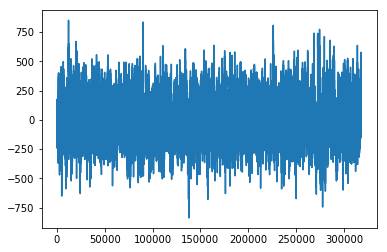

In [35]:
plt.plot(data[:,0])

### Psd

In [42]:
fs = 1000
nperseg = 1000
noverlap = nperseg/2
start = 0
end = 1
session_num = 1
#f_axis, f_time, spg = sig.spectrogram(data.T, fs=fs, nperseg=nperseg, noverlap=nperseg/2)

# plot psd
#plt.loglog(np.mean(spg,axis=1))

freqs, psd = ndsp.spectral.psd(data[:,:].T, Fs=fs, nperseg=nperseg, noverlap=nperseg/2)

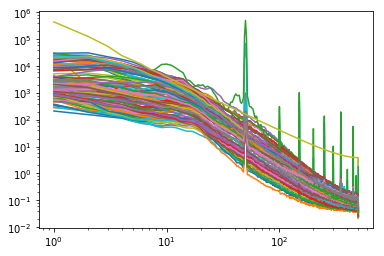

In [43]:
plt.loglog(freqs,psd.T);

In [44]:
freqs, scv = spectral.scv(data[:,0], fs, nperseg=int(fs),noverlap=noverlap)

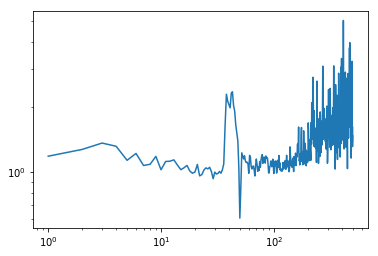

In [45]:
plt.loglog(freqs,scv)

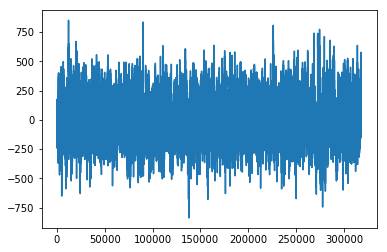

In [46]:
plt.plot(data[:,0])

## EEG

### data access

In [23]:
data_path ="/Users/Lauren/Data/NeuroTycho/EEGECoG/20110607S1_EEGECoG_Su_Oosugi-Naoya+Nagasaka-Yasuo+Hasegawa+Naomi_ECoG128-EEG18_mat/EEG01.mat"

In [24]:
matfile = io.loadmat(data_path, squeeze_me=True)
data = matfile['EEG2']

In [25]:
data

array([[-11465.12780375, -19953.40692447, -17660.05320467, ...,
        -19559.65302543, -21004.82569204, -16317.29383399],
       [ -9278.25421098, -16147.63494863, -14287.93622316, ...,
        -15719.61129424, -16881.06096529, -13113.80708598],
       [ -5961.67163905, -10375.45196088,  -9181.15578726, ...,
        -10212.15366939, -10966.68266492,  -8519.30818428],
       ..., 
       [ -5973.65323526, -10393.03699542,  -9200.83523193, ...,
         -9344.37617967, -10034.78909363,  -7795.38019517],
       [ -4301.78338752,  -7483.2665551 ,  -6623.46423705, ...,
         -6933.30735757,  -7445.5775021 ,  -5783.98876747],
       [  1438.37802555,   2496.08904316,   2207.29639096, ...,
          2241.33405079,   2406.9358998 ,   1869.79320335]])

In [29]:
data.shape[1]/fs

80.032958984375

### PSD &scv

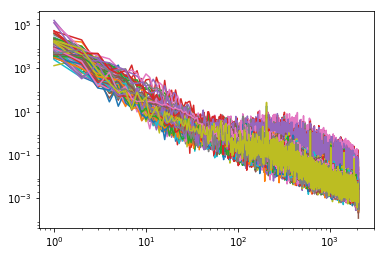

In [28]:
fs = 4096
nperseg = fs
noverlap = nperseg/2
start = 0
end = 1
session_num = 1
f_axis, f_time, spg = sig.spectrogram(data, fs=fs, nperseg=nperseg, noverlap=nperseg/2)

# plot psd
_ = plt.loglog(np.mean(spg,axis=0))

In [14]:
scv = spectral.scv(data, fs, nperseg=int(fs),noverlap=noverlap)

In [15]:
scv[1]

array([[  1.54580081,   2.03574252,   2.72762382, ...,  10.49120924,
         10.805122  ,  11.68770116],
       [  1.64328143,   1.95072531,   2.33093076, ...,   4.64771545,
          4.62851599,   4.88837595],
       [  2.608372  ,   2.16685166,   2.30882243, ...,  10.07310281,
          8.7648529 ,   9.01835798],
       ..., 
       [  3.70067823,   3.59652371,   4.40259681, ...,   1.91279341,
          1.63434711,   2.11736688],
       [  6.61967415,   4.83975834,   3.34781151, ...,   3.07122062,
          3.63506364,   4.0056659 ],
       [ 13.13018979,  14.97528679,  17.82889414, ...,   1.05360687,
          0.96245866,   1.34982176]])

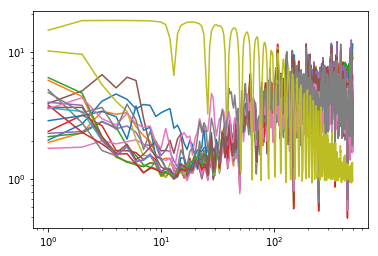

In [16]:
_ = plt.loglog(scv[1].T)

## ECoG Visual Grating

In [17]:
data_path = "/Users/Lauren/Data/NeuroTycho/VisualGrating/20100723S1_VGT_K2_KazuhitoTakenaka-ToruYanagawa_mat_ECoG128-Event3/"

In [18]:
from codes import access_nt as asc

In [19]:
session = 0
#chan = np.arange(1,129).tolist()
chan = [1]
data = asc.get_ECoG(data_path, session, chan)

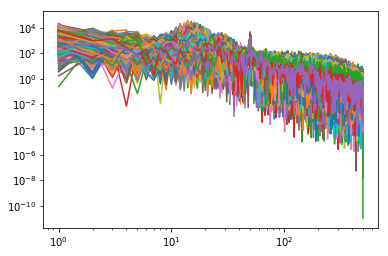

In [20]:
fs = 1000
nperseg = 1000
noverlap = nperseg/2
start = 0
end = 1
session_num = 1
f_axis, f_time, spg = sig.spectrogram(data, fs=fs, nperseg=nperseg, noverlap=nperseg/2)

# plot psd
_ = plt.loglog(np.mean(spg,axis=0))

In [21]:
scv = spectral.scv(data, fs, nperseg=int(fs),noverlap=noverlap)

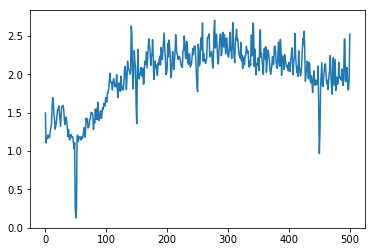

In [22]:
_ = plt.plot(scv[1][0])